In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications import ResNet50
import pickle
import matplotlib.pyplot as plt
import keras.utils as image

In [4]:
img_width, img_height = 224, 224  # Default input size for VGG16

# Initialize the model
model = Sequential()

# Instantiate convolutional base
# ResNet50 model
conv_base = ResNet50(weights='imagenet', 
                  include_top=False,
                  input_shape=(img_width, img_height, 3))

# Add the convolutional base to the model
model.add(conv_base)

# Add GlobalAveragePooling2D layer to the model
model.add(GlobalAveragePooling2D())

In [5]:
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
    img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application

    # Extract features matrix
    features = np.around( model.predict(img_tensor.reshape(1,img_width, img_height, 3)) , decimals=2 )
        
    return features[0] # the [0] is just to make it a vector instead of a matrix

In [6]:
def recommend(user_file, user_in):
    # Load the features list for the selected class
    item_to_load = user_in
    file_to_load = "./ResNet_features/" + item_to_load + ".pkl"
    with open(file_to_load, 'rb') as file:
        loaded_list = pickle.load(file)

    # Extract features for the input image
    img_features = extract_features(user_file)

    # Compare the features vectors to get the closest image
    results = []
    for i in range(len(loaded_list)):
        results.append(np.linalg.norm(img_features - loaded_list[i][1]) ) #compute L2 norm between the features vectors, append to results list

    # Get the best image
    best = results.index(min(results)) #index of image with least cost
    best_name = loaded_list[best][0]
    best_path = "../Dataset/"+user_in+"/"+best_name+".jpg"

    # Show the image
    best_img = image.load_img(best_path)
    plt.imshow(best_img)                           
    plt.axis('off')
    plt.show()

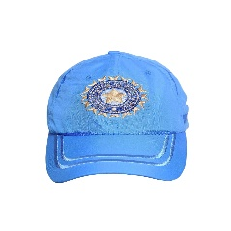

In [7]:
# USER INPUTS (an image of a product he have + type of product to be recommended)
user_image = "../Dataset/Caps/1656.jpg"
user_class = "Shorts" # Options are: Handbags, Shoes, Tops, Watches

org_img = image.load_img(user_image)
plt.imshow(org_img)                           
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 277ms/step


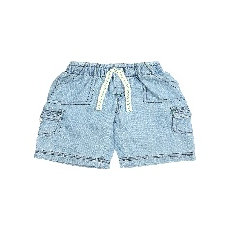

In [9]:
recommend(user_image , user_class)